In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

In [8]:
from sklearn.datasets import load_diabetes
diabetes=load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [9]:
print(diabetes["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [11]:
X=pd.DataFrame(diabetes['data'],columns=['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6'])

In [12]:
y=diabetes['target']

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

[Text(0.5380533854166667, 0.9722222222222222, 'x[8] <= -0.0\nsquared_error = 5845.82\nsamples = 353\nvalue = 152.918'),
 Text(0.3251780399659864, 0.9166666666666666, 'x[2] <= 0.006\nsquared_error = 3179.573\nsamples = 183\nvalue = 113.268'),
 Text(0.43161571269132654, 0.9444444444444444, 'True  '),
 Text(0.21192070578231292, 0.8611111111111112, 'x[5] <= 0.105\nsquared_error = 2181.501\nsamples = 140\nvalue = 100.221'),
 Text(0.2091996173469388, 0.8055555555555556, 'x[6] <= 0.021\nsquared_error = 2028.064\nsamples = 139\nvalue = 99.122'),
 Text(0.10316751700680273, 0.75, 'x[1] <= 0.003\nsquared_error = 2546.201\nsamples = 73\nvalue = 110.068'),
 Text(0.05905612244897959, 0.6944444444444444, 'x[6] <= 0.017\nsquared_error = 2838.332\nsamples = 33\nvalue = 125.97'),
 Text(0.042091836734693876, 0.6388888888888888, 'x[9] <= -0.057\nsquared_error = 2640.4\nsamples = 31\nvalue = 121.29'),
 Text(0.0163265306122449, 0.5833333333333334, 'x[3] <= -0.038\nsquared_error = 986.222\nsamples = 6\nvalue

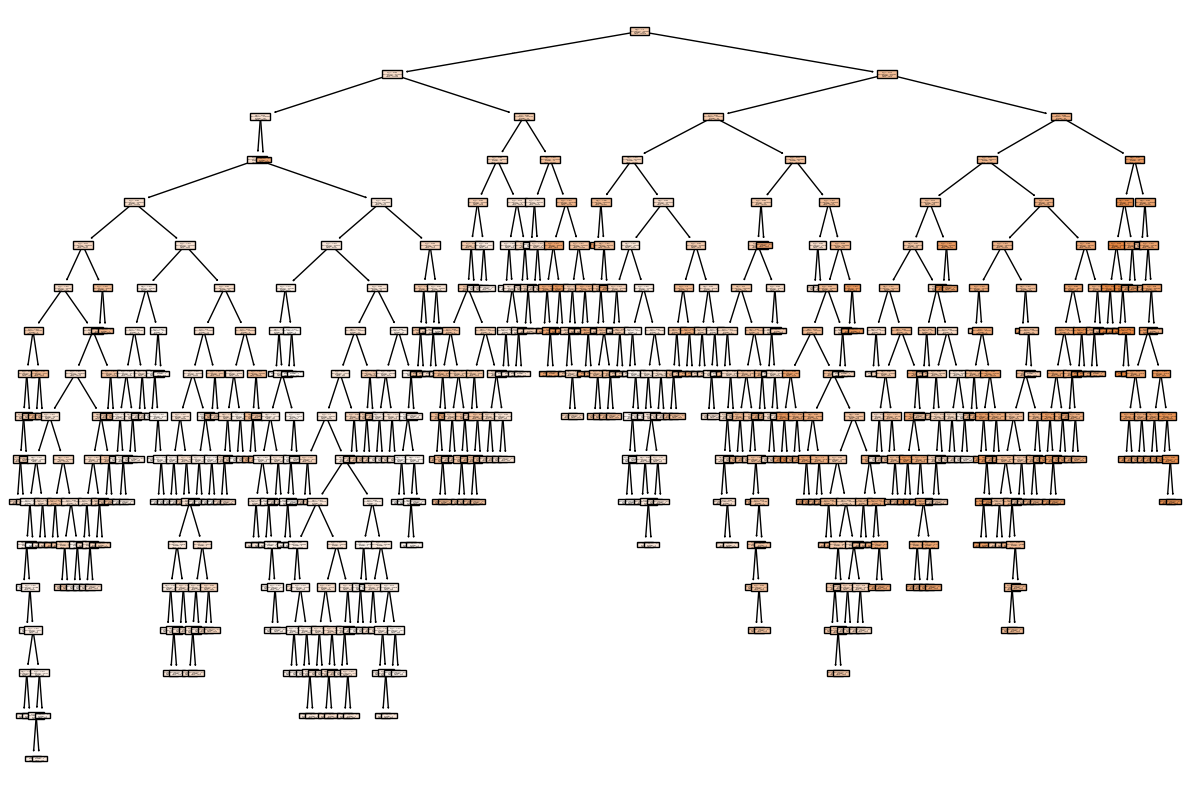

In [15]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(X_train,y_train)
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)

In [21]:
y_pred=model.predict(X_test)
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

-0.12158411234582656


In [17]:
param_grid = {
    'max_depth': [1,2,3,4,5,10,15,25],
    'splitter':['best', 'random'],
    
    'criterion':['squared_error', 'friedman_mse', 'absolute_error'],
    'max_features':['sqrt', 'log2']
}

In [23]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5,scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [25]:
grid_search.best_score_

np.float64(-3913.5089392388463)

In [28]:
y_pred=grid_search.predict(X_test)
score=r2_score(y_test,y_pred)
print(score)

0.11258257335706734
